## 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. If your group consists of students from different classes, upload in **both** classes.

1. First we need to remove all the redundant columns. Please keep the following 22 columns and remove all others:

    id\
    name  
    host_id  
    host_name  
    neighbourhood_cleansed  
    latitude  
    longitude  
    room_type  
    price  
    minimum_nights  
    number_of_reviews  
    last_review  
    review_scores_rating  
    review_scores_accuracy  
    review_scores_cleanliness  
    review_scores_checkin  
    review_scores_communication  
    review_scores_location  
    review_scores_value  
    reviews_per_month  
    calculated_host_listings_count  
    availability_365



2. Next we have to handle missing values. Remove all rows where `number_of_reviews = 0`. If there are still missing values, remove the rows that contain them so you have a data set with no missing values.

3. Fix the `neighbourhood_cleansed` values (some are missing 'æ ø å'), and if necessary change the price to DKK.

4. Create a fitting word cloud based on the `name` column. Feel free to remove non-descriptive stop words (e.g. since this is about Copenhagen, perhaps the word 'Copenhagen' is redundant).

5. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

6. Create a new column using bins of price. Use 11 bins, evenly distributed but with the last bin $> 10,000$.

7. Using non-scaled versions of latitude and longitude, plot the listings data on a map. Use the newly created price bins as a color parameter. Also, create a plot (i.e. another plot) where you group the listings with regard to the neighbourhood.

8. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

9. Create a bar chart of the hosts with the top ten most listings. Place host id on the x-axis and the count of listings on the y-axis.

10. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

11. Supply a list of the top 10 highest rated listings and visualize them on a map.

12. Now, use any preprocessing and feature engineering steps that you find relevant before proceeding (optional).

13. Create another new column, where the price is divided into two categories: "expensive" listings defined by all listings with a price higher than the median price, and "affordable" listings defined by all listings with a price equal to or below the median price. You can encode the affordable listings as "0" and the expensive ones as "1". All listings should now have a classification indicating either expensive listings (1) or affordable listings (0).

14. Based on self-chosen features, develop a Naïve Bayes and k-Nearest Neighbor model to determine whether a rental property should be classified as 0 or 1. Remember to divide your data into training data and test data. Comment on your findings.

15. Try to come up with a final conclusion to the Airbnb-Copenhagen assignment.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('listings.csv')
df = df[['id', 'name', 'host_id', 'host_name', 'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
df = df[df['number_of_reviews'] != 0]
df = df.dropna()
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].str.replace('æ', 'ae')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].str.replace('ø', 'oe')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].str.replace('å', 'aa')
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(float)
df['price'] = df['price']

C:\Users\micha\AppData\Local\Temp\ipykernel_5124\887791241.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '')


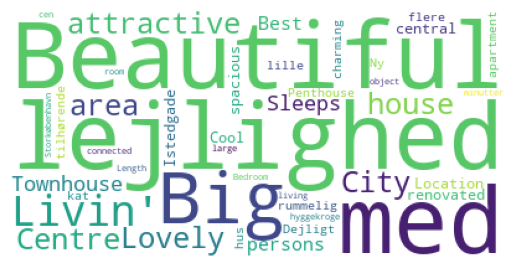

In [3]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.add('copenhagen')
stopwords.add('dtype')
stopwords.add('og')
stopwords.add('fra')
stopwords.add('N')
stopwords.add('ude')
stopwords.add('Name')
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=200,
    max_font_size=200,
    random_state=42
).generate(str(df['name']))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

(-0.5, 399.5, 199.5, -0.5)

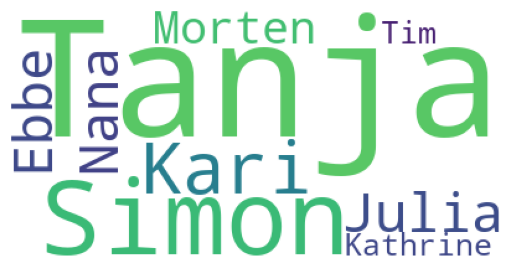

In [4]:
stopwords = set(STOPWORDS)
stopwords.add('object')
stopwords.add('host_name')
stopwords.add('dtype')
stopwords.add('length')
stopwords.add('Name')

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=200,
    max_font_size=200,
    random_state=42
).generate(str(df['host_name']))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')


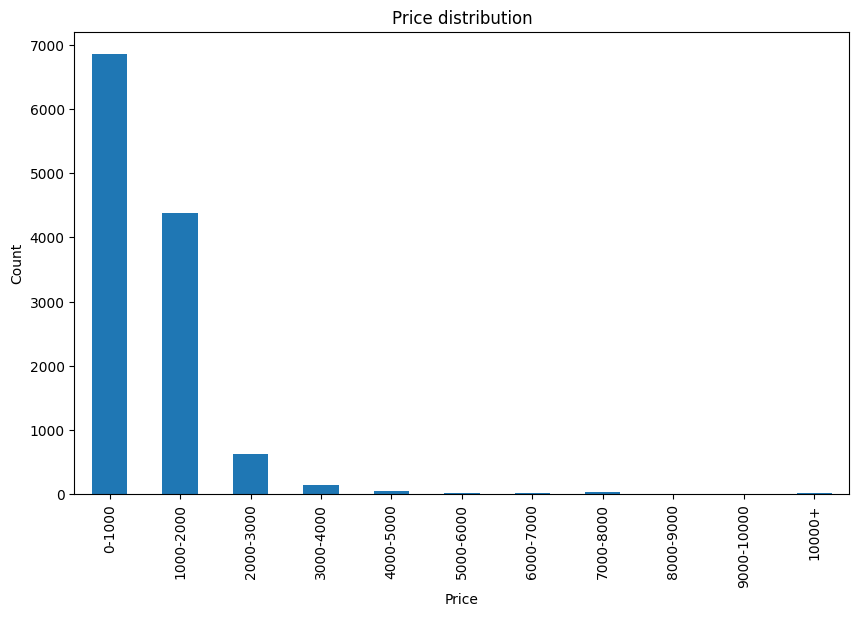

In [5]:
bin_edges = list(range(0, 10001, 1000)) + [float('inf')]
bin_labels = ['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000-7000', '7000-8000', '8000-9000', '9000-10000', '10000+']
df['price_bins'] = pd.cut(df['price'], bins=bin_edges, labels=bin_labels)
value_counts = df['price_bins'].value_counts().loc[bin_labels]
value_counts.plot(kind='bar', figsize=(10, 6), title='Price distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

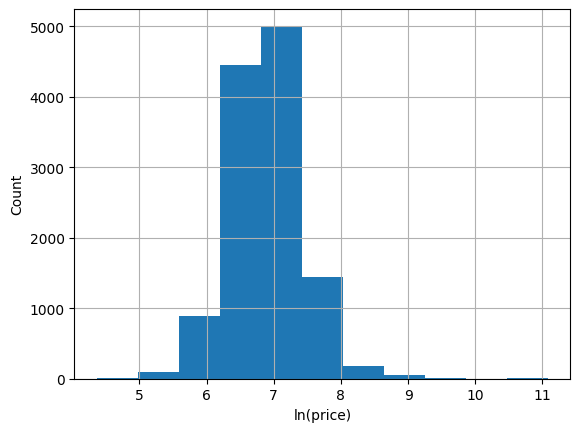

In [6]:
# show  the distribution of ln(price)
df['ln_price'] = np.log(df['price'])
df['ln_price'].hist(bins=11)
plt.xlabel('ln(price)')
plt.ylabel('Count')
plt.show()


In [7]:
import folium
from folium.plugins import MarkerCluster

df_map = df[['latitude', 'longitude', 'price', 'price_bins']].dropna().reset_index(drop=True)

m = folium.Map(location=[55.6761, 12.5683], zoom_start=11)

def categorize(price):
    if price <= 4000:
        return 'green'
    elif 4001 <= price <= 7000:
        return 'yellow'
    else:
        return 'red'
marker_cluster = MarkerCluster().add_to(m)
for _, row in df_map.iterrows():
    color = categorize(row['price'])
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        popup=f"Price: {row['price']} - Bin: {row['price_bins']}"
    ).add_to(marker_cluster)

m.save('map.html')


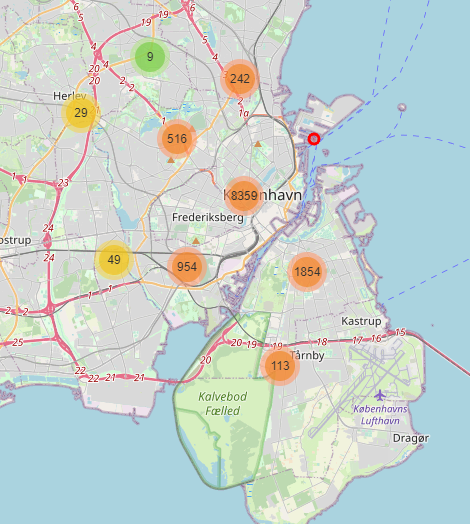    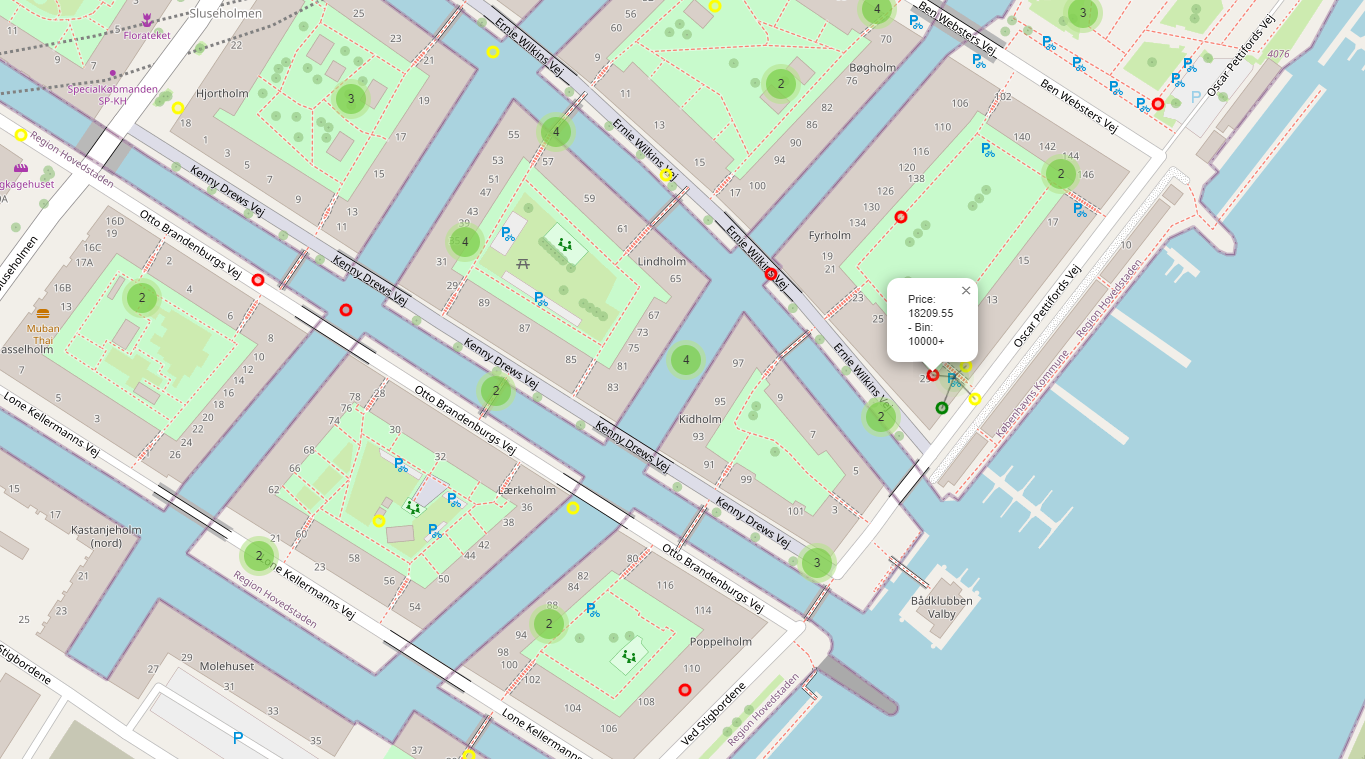

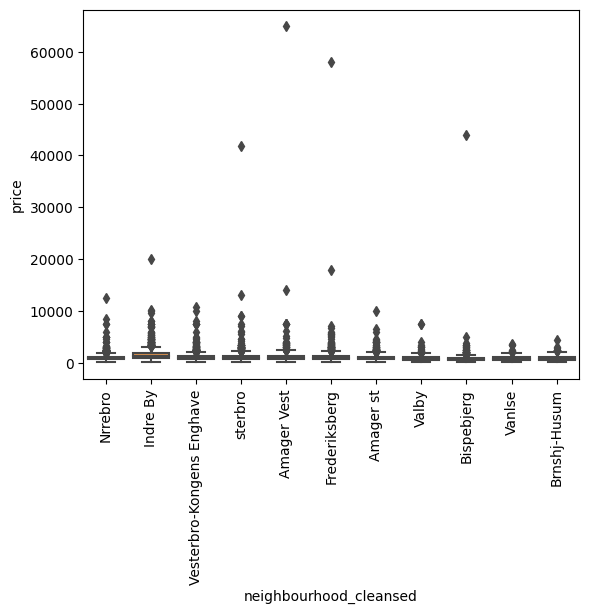

In [8]:
#8. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

boxplot_neighbourhood_price = sns.boxplot(x='neighbourhood_cleansed', y='price', data=df)
boxplot_neighbourhood_price.set_xticklabels(boxplot_neighbourhood_price.get_xticklabels(), rotation=90)
plt.show()


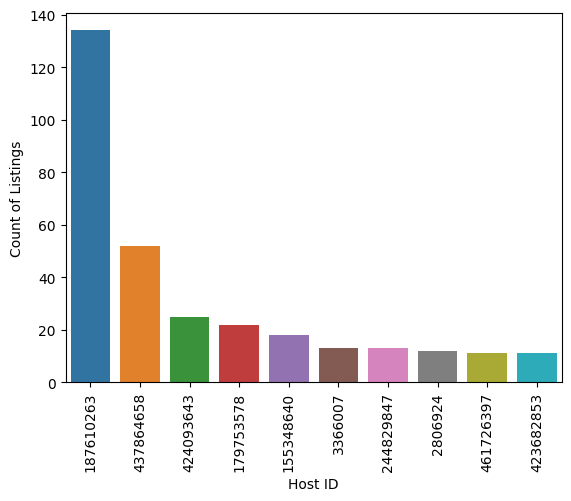

In [9]:
barplot_host_id = sns.countplot(x='host_id', data=df, order=df['host_id'].value_counts().iloc[:10].index)
barplot_host_id.set_xticklabels(barplot_host_id.get_xticklabels(), rotation=90)
barplot_host_id.set(xlabel='Host ID', ylabel='Count of Listings')
plt.show()

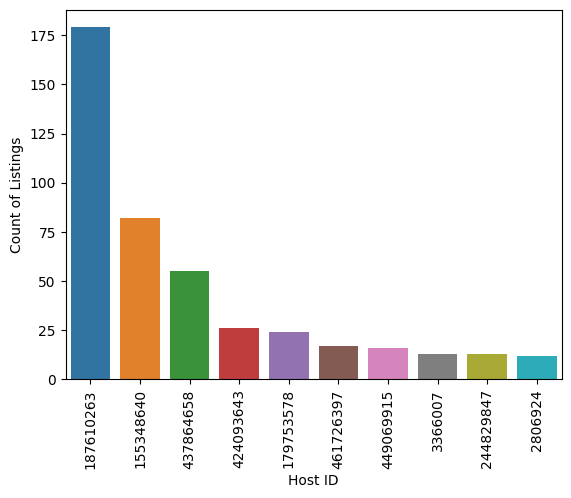

In [10]:
df_calculated_host_listings_count = df.sort_values(by=['calculated_host_listings_count'], ascending=False)
df_calculated_host_listings_count = df_calculated_host_listings_count.drop_duplicates(subset='host_id', keep='first')
df_calculated_host_listings_count = df_calculated_host_listings_count.head(10)
df_calculated_host_listings_count = df_calculated_host_listings_count[['host_id', 'calculated_host_listings_count']]

barplot_calculated_host_listings_count = sns.barplot(x='host_id', y='calculated_host_listings_count', data=df_calculated_host_listings_count,
                                                    order=df_calculated_host_listings_count.sort_values(by='calculated_host_listings_count', ascending=False)['host_id'])
barplot_calculated_host_listings_count.set_xticklabels(barplot_calculated_host_listings_count.get_xticklabels(), rotation=90)
barplot_calculated_host_listings_count.set(xlabel='Host ID', ylabel='Count of Listings')
plt.show()

In [11]:
neighbourhood = df.groupby('neighbourhood_cleansed')
neighbourhood['room_type'].describe()

,count,unique,top,freq
neighbourhood_cleansed,,,,
Amager Vest,1059,3,Entire home/apt,909
Amager st,924,4,Entire home/apt,791
Bispebjerg,604,3,Entire home/apt,508
Brnshj-Husum,285,3,Entire home/apt,216
Frederiksberg,1177,2,Entire home/apt,1044
Indre By,1844,4,Entire home/apt,1702
Nrrebro,2057,3,Entire home/apt,1889
Valby,539,2,Entire home/apt,450
Vanlse,298,2,Entire home/apt,254


In [12]:
neighbourhood['price'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_cleansed,,,,,,,,
Amager Vest,1059.0,1205.754485,2121.656424,200.0,722.00,1000.0,1400.00,64900.0
Amager st,924.0,1019.860390,704.769611,135.0,650.00,851.0,1190.00,10000.0
Bispebjerg,604.0,912.066225,1831.810612,143.0,542.25,747.5,961.00,44000.0
Brnshj-Husum,285.0,875.487719,552.009744,145.0,500.00,750.0,1100.00,4462.0
Frederiksberg,1177.0,1216.676296,1866.619993,185.0,750.00,1000.0,1339.00,58000.0
Indre By,1844.0,1570.907267,1065.975980,165.0,995.00,1350.0,1870.50,20000.0
Nrrebro,2057.0,1014.792902,609.390458,79.0,720.00,900.0,1199.00,12500.0
Valby,539.0,932.137291,622.836251,127.0,600.00,800.0,1119.50,7429.0
Vanlse,298.0,874.543624,502.561017,200.0,536.75,750.5,1091.75,3643.0


In [13]:
neighbourhood['minimum_nights'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_cleansed,,,,,,,,
Amager Vest,1059.0,3.803588,8.562853,1.0,2.0,3.0,4.0,180.0
Amager st,924.0,4.240260,7.863038,1.0,2.0,3.0,4.0,90.0
Bispebjerg,604.0,4.562914,20.536123,1.0,2.0,3.0,4.0,500.0
Brnshj-Husum,285.0,4.456140,5.777781,1.0,2.0,3.0,5.0,60.0
Frederiksberg,1177.0,4.441801,13.595788,1.0,2.0,3.0,4.0,365.0
Indre By,1844.0,4.412690,14.861322,1.0,2.0,3.0,4.0,400.0
Nrrebro,2057.0,4.736509,28.390937,1.0,2.0,3.0,4.0,1111.0
Valby,539.0,3.853432,9.903758,1.0,2.0,3.0,4.0,200.0
Vanlse,298.0,4.026846,4.841524,1.0,2.0,3.0,4.0,45.0


In [14]:
print(neighbourhood['price'].quantile([0.25, 0.5, 0.75]))

neighbourhood_cleansed         
Amager Vest                0.25     722.00
                           0.50    1000.00
                           0.75    1400.00
Amager st                  0.25     650.00
                           0.50     851.00
                           0.75    1190.00
Bispebjerg                 0.25     542.25
                           0.50     747.50
                           0.75     961.00
Brnshj-Husum               0.25     500.00
                           0.50     750.00
                           0.75    1100.00
Frederiksberg              0.25     750.00
                           0.50    1000.00
                           0.75    1339.00
Indre By                   0.25     995.00
                           0.50    1350.00
                           0.75    1870.50
Nrrebro                    0.25     720.00
                           0.50     900.00
                           0.75    1199.00
Valby                      0.25     600.00
                      

In [15]:
df_top10_highest = df[['latitude', 'longitude', 'price', 'price_bins', 'review_scores_rating']].dropna().reset_index(drop=True).sort_values(by='review_scores_rating', ascending=False).head(10)
m = folium.Map(location=[55.6761, 12.5683], zoom_start=11)
marker_cluster = MarkerCluster().add_to(m)
for _, row in df_top10_highest.iterrows():
    color = categorize(row['price'])
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        popup=f"Price: {row['price']} - Bin: {row['price_bins']}"
    ).add_to(marker_cluster)

m.save('map_top10_highest.html')

In [16]:
df_preprocessing = df[['neighbourhood_cleansed', 'room_type', 'price', 'minimum_nights']]

In [17]:
df_preprocessing['expensive'] = np.where(df_preprocessing['price'] > df_preprocessing['price'].median(), 1, 0)

C:\Users\micha\AppData\Local\Temp\ipykernel_5124\2048655861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocessing['expensive'] = np.where(df_preprocessing['price'] > df_preprocessing['price'].median(), 1, 0)


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [19]:
df_preprocessing = pd.concat([df_preprocessing, pd.get_dummies(df_preprocessing['room_type'])], axis=1)
df_preprocessing = pd.concat([df_preprocessing, pd.get_dummies(df_preprocessing['neighbourhood_cleansed'])], axis=1)
df_preprocessing = df_preprocessing.drop(['neighbourhood_cleansed', 'room_type'], axis=1)

In [21]:
y = df_preprocessing['expensive']
X = df_preprocessing.drop(['expensive'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print('Accuracy score for Naive Bayes: ', accuracy_score(y_test, y_pred))
print('AUC score for Naive Bayes: ', roc_auc_score(y_test, y_pred))
scores = cross_val_score(gnb, X, y, cv=5, scoring='roc_auc')
print('Cross validation scores for Naive Bayes: ', scores)
print('Mean cross validation score for Naive Bayes: ', scores.mean())

Accuracy score for Naive Bayes:  0.6826051112943117
AUC score for Naive Bayes:  0.6748340136054422
Cross validation scores for Naive Bayes:  [0.8996716  0.90427942 0.91375869 0.91807672 0.89457683]
Mean cross validation score for Naive Bayes:  0.9060726527115877


In [31]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy score for KNN: ', accuracy_score(y_test, y_pred))
print('AUC score for KNN: ', roc_auc_score(y_test, y_pred))
scores = cross_val_score(knn, X, y, cv=5, scoring='roc_auc')
print('Cross validation scores for KNN: ', scores)
print('Mean cross validation score for KNN: ', scores.mean())

Accuracy score for KNN:  0.9987633965375103
AUC score for KNN:  0.9987244897959184
Cross validation scores for KNN:  [0.99999898 0.99999796 0.99999796 1.         1.        ]
Mean cross validation score for KNN:  0.9999989798670921


In [33]:
#try XGBoost classifier
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print('Accuracy score for XGBoost: ', accuracy_score(y_test, y_pred))
print('AUC score for XGBoost: ', roc_auc_score(y_test, y_pred))
scores = cross_val_score(xgb_model, X, y, cv=5, scoring='roc_auc')
print('Cross validation scores for XGBoost: ', scores)
print('Mean cross validation score for XGBoost: ', scores.mean())

Accuracy score for XGBoost:  1.0
AUC score for XGBoost:  1.0
Cross validation scores for XGBoost:  [1. 1. 1. 1. 1.]
Mean cross validation score for XGBoost:  1.0


In [ ]:
#15. Try to come up with a final conclusion to the Airbnb-Copenhagen assignment.